Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

https://cooltools.readthedocs.io/en/latest/notebooks/


In [1]:
%%bash
pip install cooler
pip install cooltools
pip install hicrep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=f27d0aac2ae2abab2987f8900ed27e3d64ec663666fa39bad7283e91c954700b
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requir

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
import cooler
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
import scipy

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
mcool = []
for i in range(4):
  mcool.append(f'/content/drive/MyDrive/bioinf/hic/HiC{i+1}.dm3.mapq_30.1000.mcool')
mcool

['/content/drive/MyDrive/bioinf/hic/HiC1.dm3.mapq_30.1000.mcool',
 '/content/drive/MyDrive/bioinf/hic/HiC2.dm3.mapq_30.1000.mcool',
 '/content/drive/MyDrive/bioinf/hic/HiC3.dm3.mapq_30.1000.mcool',
 '/content/drive/MyDrive/bioinf/hic/HiC4.dm3.mapq_30.1000.mcool']

In [5]:
resolution = 20000
clr = []
for i in range(4):
  clr.append(cooler.Cooler(f'{mcool[i]}::resolutions/{resolution}'))
clr

[<Cooler "HiC1.dm3.mapq_30.1000.mcool::/resolutions/20000">,
 <Cooler "HiC2.dm3.mapq_30.1000.mcool::/resolutions/20000">,
 <Cooler "HiC3.dm3.mapq_30.1000.mcool::/resolutions/20000">,
 <Cooler "HiC4.dm3.mapq_30.1000.mcool::/resolutions/20000">]

Информация и атрибуты матрицы Hi-C

In [8]:
for i in range(4):
  print(clr[i].info)

{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:39:00.281457', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7122786, 'storage-mode': 'symmetric-upper', 'sum': 63912926}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:16:47.610855', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7386462, 'storage-mode': 'symmetric-upper', 'sum': 61819050}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:23:11.844138', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024,

Сбалансированная матрица

In [62]:
m_bl = []
start = 7_000_000
end = start + 1_500_000
region = ('chr3R', start, end)
for i in range(4):
  m_bl.append(clr[i].matrix(balance=True).fetch(region))
m_bl[0]

array([[1.01550919e+00, 5.44871296e-02, 1.11369694e-02, ...,
        8.62770976e-04, 3.91712538e-04, 4.18181584e-04],
       [5.44871296e-02, 6.54764501e-01, 6.46041148e-02, ...,
        7.29869953e-04, 8.28433094e-04, 1.14973624e-03],
       [1.11369694e-02, 6.46041148e-02, 4.83024810e-01, ...,
        8.52472802e-04, 1.48364181e-03, 8.26380201e-04],
       ...,
       [8.62770976e-04, 7.29869953e-04, 8.52472802e-04, ...,
        6.66264072e-01, 8.58774749e-02, 2.51140924e-02],
       [3.91712538e-04, 8.28433094e-04, 1.48364181e-03, ...,
        8.58774749e-02, 6.58459418e-01, 9.36762351e-02],
       [4.18181584e-04, 1.14973624e-03, 8.26380201e-04, ...,
        2.51140924e-02, 9.36762351e-02, 7.10903691e-01]])

<ipython-input-63-cf9996865790>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m_bl[0]),cmap='coolwarm')


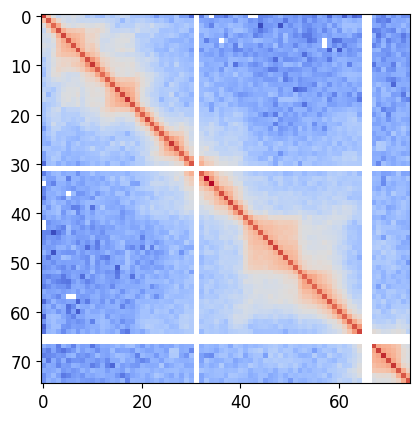

In [63]:
plt.imshow(np.log(m_bl[0]),cmap='coolwarm')

С помощью cooler.pixels() выводится следующая матрица, но она не является сбалансированной

Чтобы сделать ее сбалансированной нужно вызвать команду cooler dump -b

In [10]:
pix = []
for i in range(4):
  pix.append(clr[i].pixels(join=True)[:])
pix[0]

,chrom1,start1,end1,chrom2,start2,end2,count
0,chr2L,0,20000,chr2L,0,20000,4075
1,chr2L,0,20000,chr2L,20000,40000,481
2,chr2L,0,20000,chr2L,40000,60000,182
3,chr2L,0,20000,chr2L,60000,80000,183
4,chr2L,0,20000,chr2L,80000,100000,84
...,...,...,...,...,...,...,...
7122781,chrX,22380000,22400000,chrX,22420000,22422827,14
7122782,chrX,22400000,22420000,chrX,22400000,22420000,1694
7122783,chrX,22400000,22420000,chrX,22420000,22422827,27
7122784,chrX,22420000,22422827,chrX,22420000,22422827,244


In [6]:
!cooler dump -b clr[0]

Traceback (most recent call last):
  File "/usr/local/bin/cooler", line 8, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/cooler/cli/dump.py", line 192, in dump
    clr = api.Cooler(cool_uri)
  File "/usr/local/lib/python3.10/dist-packages/cooler/api.py", line 85, in __init__
    self._refresh()
  File "/usr/local/lib/python3.1

Благодаря cooler.bins() получаем матрицу, где представлены названия хромосом, каждая из которых разделена на бины (по 20000), а также вес каждого бина

In [101]:
bins = []
for i in range(4):
  bins.append(clr[i].bins()[:])
bins[0]

,chrom,start,end,weight
0,chr2L,0,20000,0.015414
1,chr2L,20000,40000,0.012686
2,chr2L,40000,60000,0.017035
3,chr2L,60000,80000,0.010652
4,chr2L,80000,100000,0.010251
...,...,...,...,...
6019,chrX,22360000,22380000,0.028927
6020,chrX,22380000,22400000,0.020546
6021,chrX,22400000,22420000,0.040442
6022,chrX,22420000,22422827,NaN


У всех 4 графиков наблюдается спад частоты контактов на тех участках, где большее расстояние, и наоборот для близких участков. Все графики получились очень похожи друг на друга.


<ipython-input-149-3591d3dd79ea>:5: RuntimeWarning: Mean of empty slice
  z[ind][i]=np.nanmean(np.diagonal(m_bl[ind],i))
<ipython-input-149-3591d3dd79ea>:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m_bl[j]))*20000,np.log(z[j]))


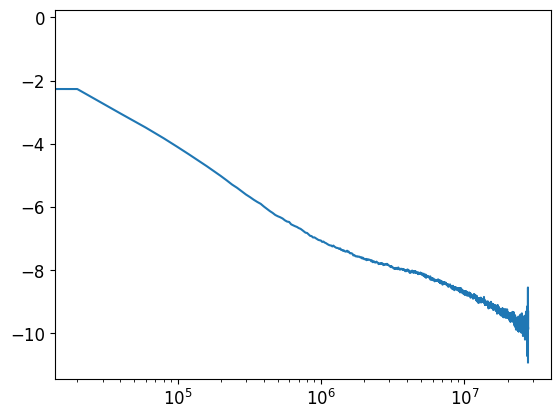

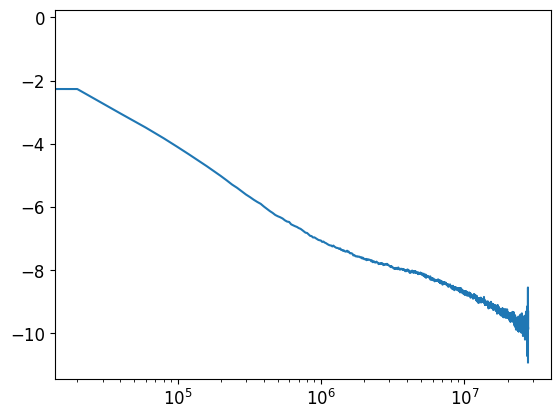

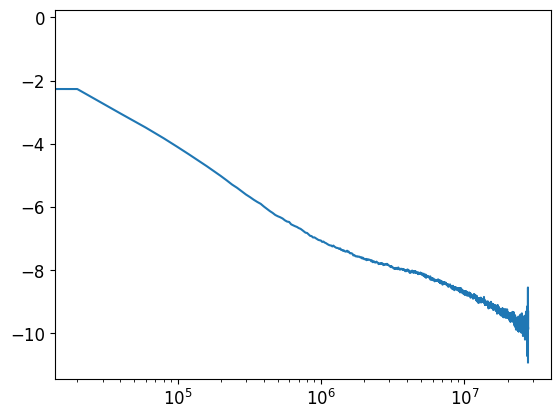

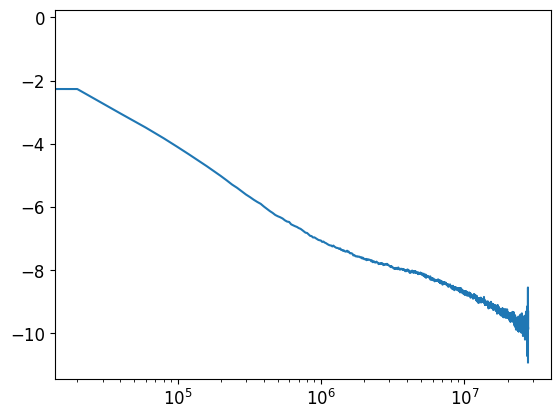

In [149]:
z = []
for ind in range(4):
  z.append(np.zeros(len(m_bl[ind])))
  for i in range(len(m_bl[ind])):
    z[ind][i]=np.nanmean(np.diagonal(m_bl[ind],i))
  plt.plot(np.arange(len(m_bl[j]))*20000,np.log(z[j]))
  plt.xscale('log')
  plt.show()

Insulation score

In [7]:
windows = [5*resolution, 10*resolution]
insulation_table = []
for i in range(4):
  insulation_table.append(insulation(clr[i], windows)[3437:4833])
insulation_table[0]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_100000,n_valid_pixels_100000,log2_insulation_score_200000,n_valid_pixels_200000,boundary_strength_100000,boundary_strength_200000,is_boundary_100000,is_boundary_200000
3437,chr3R,0,20000,chr3R,False,1.259279,3.0,1.407715,8.0,NaN,NaN,False,False
3438,chr3R,20000,40000,chr3R,True,0.986103,4.0,1.278619,9.0,NaN,NaN,False,False
3439,chr3R,40000,60000,chr3R,False,0.919044,8.0,1.307395,18.0,NaN,NaN,False,False
3440,chr3R,60000,80000,chr3R,False,0.859088,12.0,1.233935,27.0,NaN,NaN,False,False
3441,chr3R,80000,100000,chr3R,False,0.795779,17.0,1.186162,37.0,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,chr3R,27820000,27840000,chr3R,False,0.952983,17.0,1.624281,33.0,NaN,NaN,False,False
4829,chr3R,27840000,27860000,chr3R,False,1.049838,12.0,1.677226,24.0,NaN,NaN,False,False
4830,chr3R,27860000,27880000,chr3R,False,1.030581,7.0,1.590957,15.0,NaN,NaN,False,False
4831,chr3R,27880000,27900000,chr3R,False,0.846925,3.0,1.361558,7.0,NaN,NaN,False,False


Границы тадов (посчитано для всей хромосомы)

In [17]:
def extract_TADs(insulation_table, is_boundary_col, MAX_TAD_LENGTH = 3_000_000):
    tads = bioframe.merge(insulation_table[insulation_table[is_boundary_col] == False])
    return tads[ (tads["end"] - tads["start"]) <= MAX_TAD_LENGTH].reset_index(drop=True)[['chrom','start','end']]

TADs_table = []
for i in range(4):
  TADs_table.append(extract_TADs(insulation_table[i], f'is_boundary_{windows[0]}'))
TADs_table[0]

,chrom,start,end
0,chr3R,0,280000
1,chr3R,300000,460000
2,chr3R,480000,760000
3,chr3R,780000,1060000
4,chr3R,1080000,1460000
...,...,...,...
81,chr3R,26640000,26880000
82,chr3R,26900000,27040000
83,chr3R,27060000,27220000
84,chr3R,27240000,27580000


Границы тадов для выбранной области

In [24]:
TADs_table_my = []
TADs_table_my.append(TADs_table[0][20:28])
print(TADs_table[0][20:28])

    chrom    start      end
20  chr3R  6720000  7040000
21  chr3R  7060000  7240000
22  chr3R  7260000  7420000
23  chr3R  7440000  7580000
24  chr3R  7600000  7800000
25  chr3R  7820000  8040000
26  chr3R  8060000  8200000
27  chr3R  8220000  8520000


In [25]:
TADs_table_my.append(TADs_table[1][20:28])
print(TADs_table[1][20:28])

    chrom    start      end
20  chr3R  6720000  7040000
21  chr3R  7060000  7240000
22  chr3R  7260000  7420000
23  chr3R  7440000  7580000
24  chr3R  7600000  7800000
25  chr3R  7820000  8040000
26  chr3R  8060000  8200000
27  chr3R  8220000  8520000


In [26]:
TADs_table_my.append(TADs_table[2][23:30])
print(TADs_table[2][23:30])

    chrom    start      end
23  chr3R  6720000  7040000
24  chr3R  7060000  7240000
25  chr3R  7260000  7400000
26  chr3R  7420000  7580000
27  chr3R  7600000  7800000
28  chr3R  7820000  8200000
29  chr3R  8220000  8520000


In [27]:
TADs_table_my.append(TADs_table[3][23:30])
print(TADs_table[3][23:30])

    chrom    start      end
23  chr3R  6720000  7040000
24  chr3R  7060000  7240000
25  chr3R  7260000  7400000
26  chr3R  7420000  7580000
27  chr3R  7600000  7800000
28  chr3R  7820000  8200000
29  chr3R  8220000  8520000


Запись в файл

In [28]:
for i in range(4):
  TADs_table_my[i].to_csv(f'TADs_table_HiC{i+1}.bed', index=False, sep='\t', header=None)

Далее представлена визуализация тадов: сначала с "треугольником" и соответствующим графиком, затем на графике отмечены сильными и слабыми границами, и последний - с отмеченными на "треугльнике" тадами

In [22]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


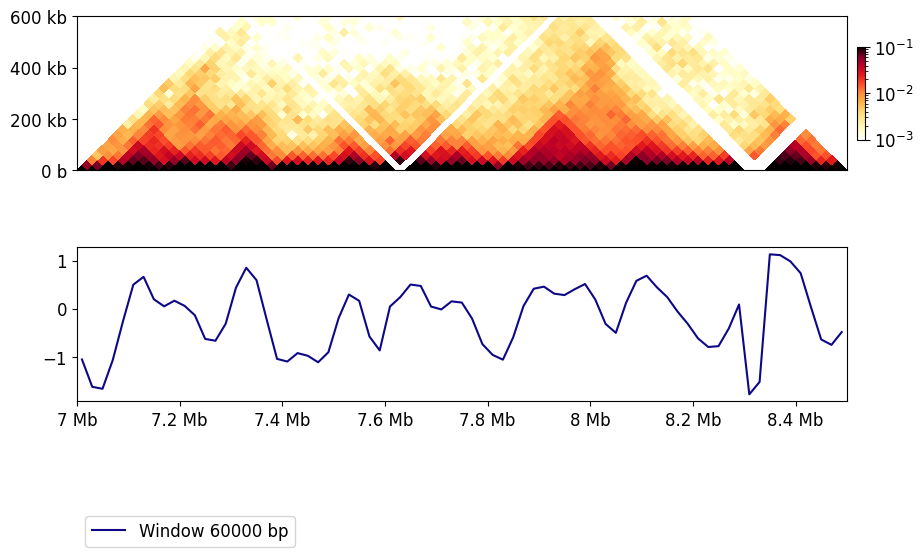

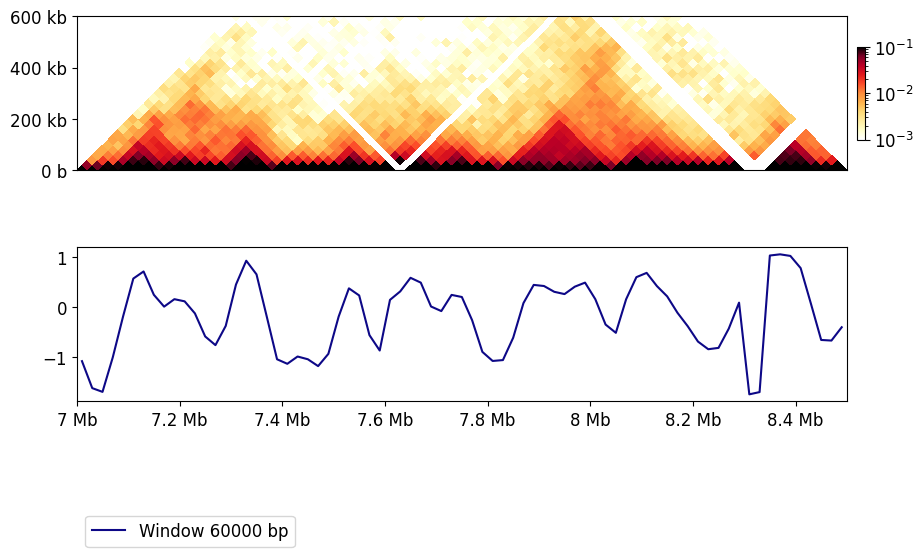

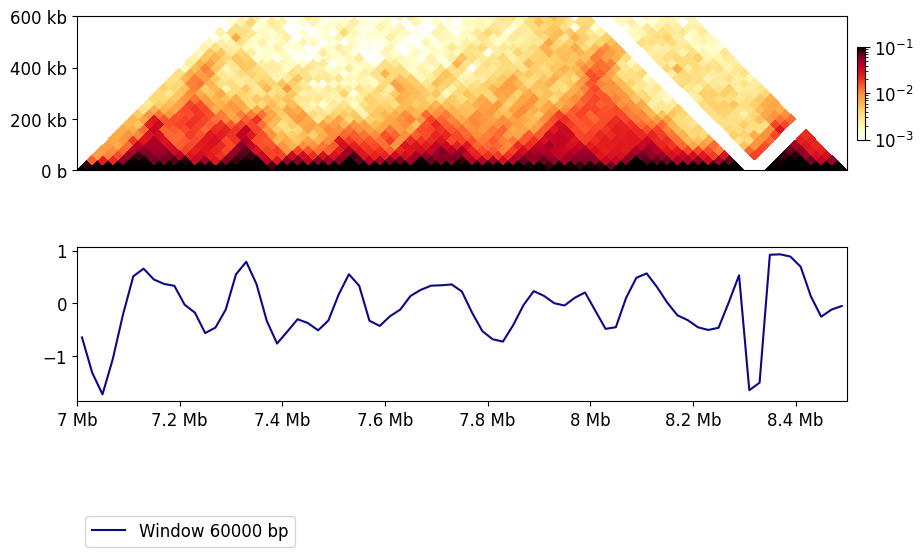

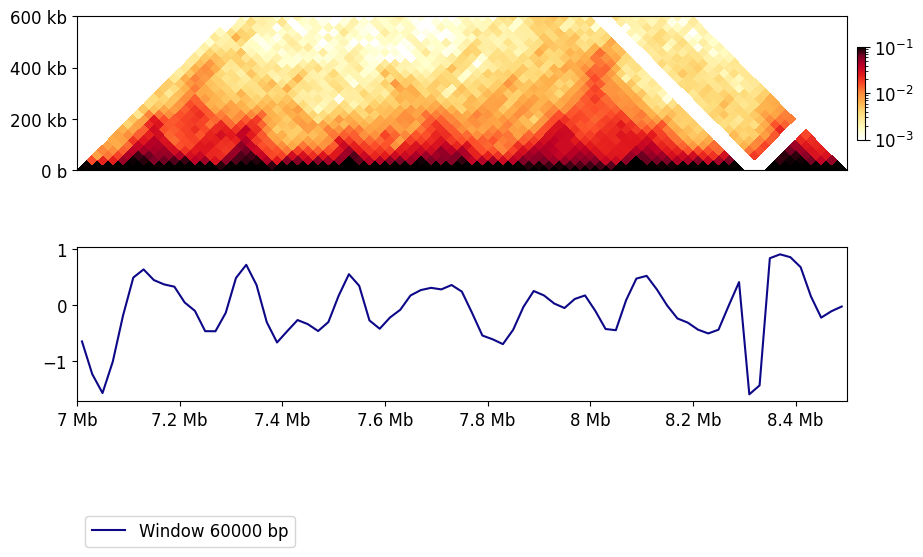

In [59]:
for i in range(4):
  plt.rcParams['font.size'] = 12

  start = 7_000_000
  end = start + 1_500_000
  region = ('chr3R', start, end)
  norm = LogNorm(vmax=0.1, vmin=0.001)
  data = clr[i].matrix(balance=True).fetch(region)
  f, ax = plt.subplots(figsize=(18, 6))
  im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
  ax.set_aspect(0.5)
  ax.set_ylim(0, 10*windows[0])
  format_ticks(ax, rotate=False)
  ax.xaxis.set_visible(False)


  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
  plt.colorbar(im, cax=cax)

  insul_region = bioframe.select(insulation_table[i], region)

  ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
  ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
  ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
              insul_region['log2_insulation_score_'+str(windows[0])],
              label=f'Window {windows[0]} bp')

  ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

  format_ticks(ins_ax, y=False, rotate=False)
  ax.set_xlim(region[1], region[2])

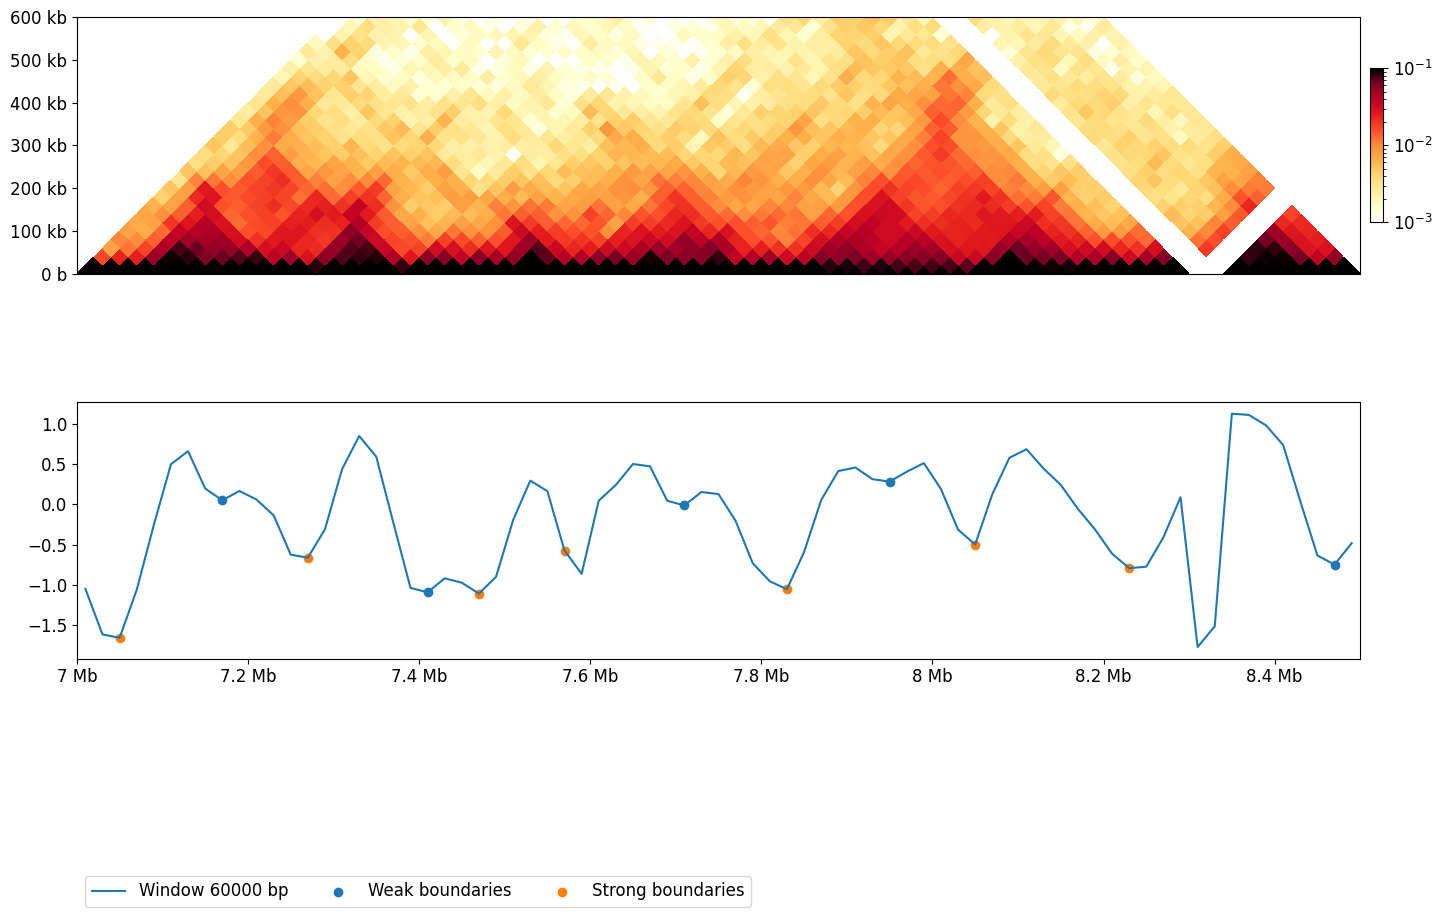

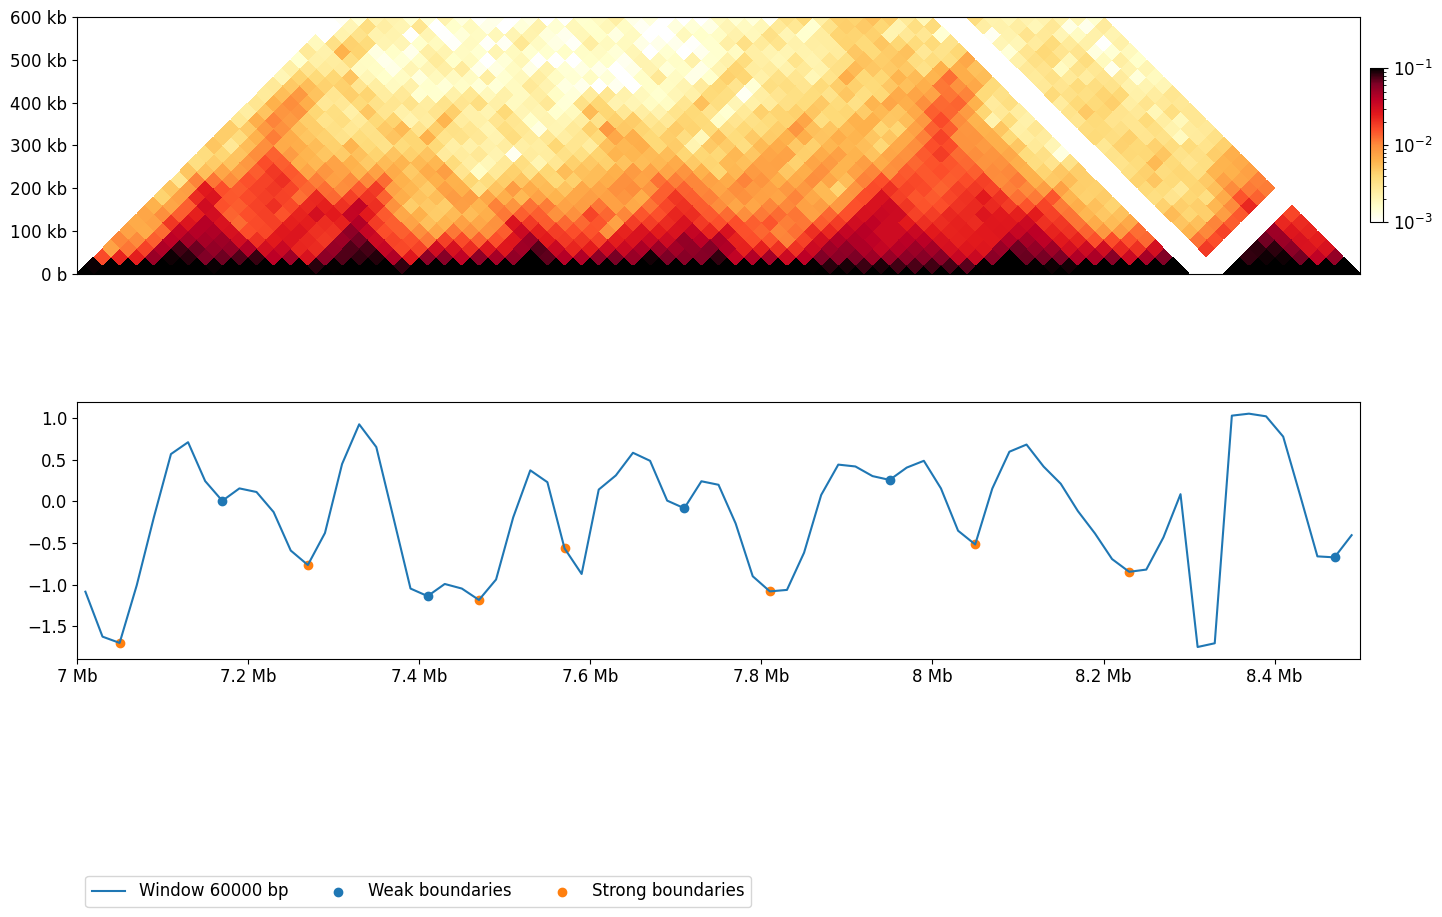

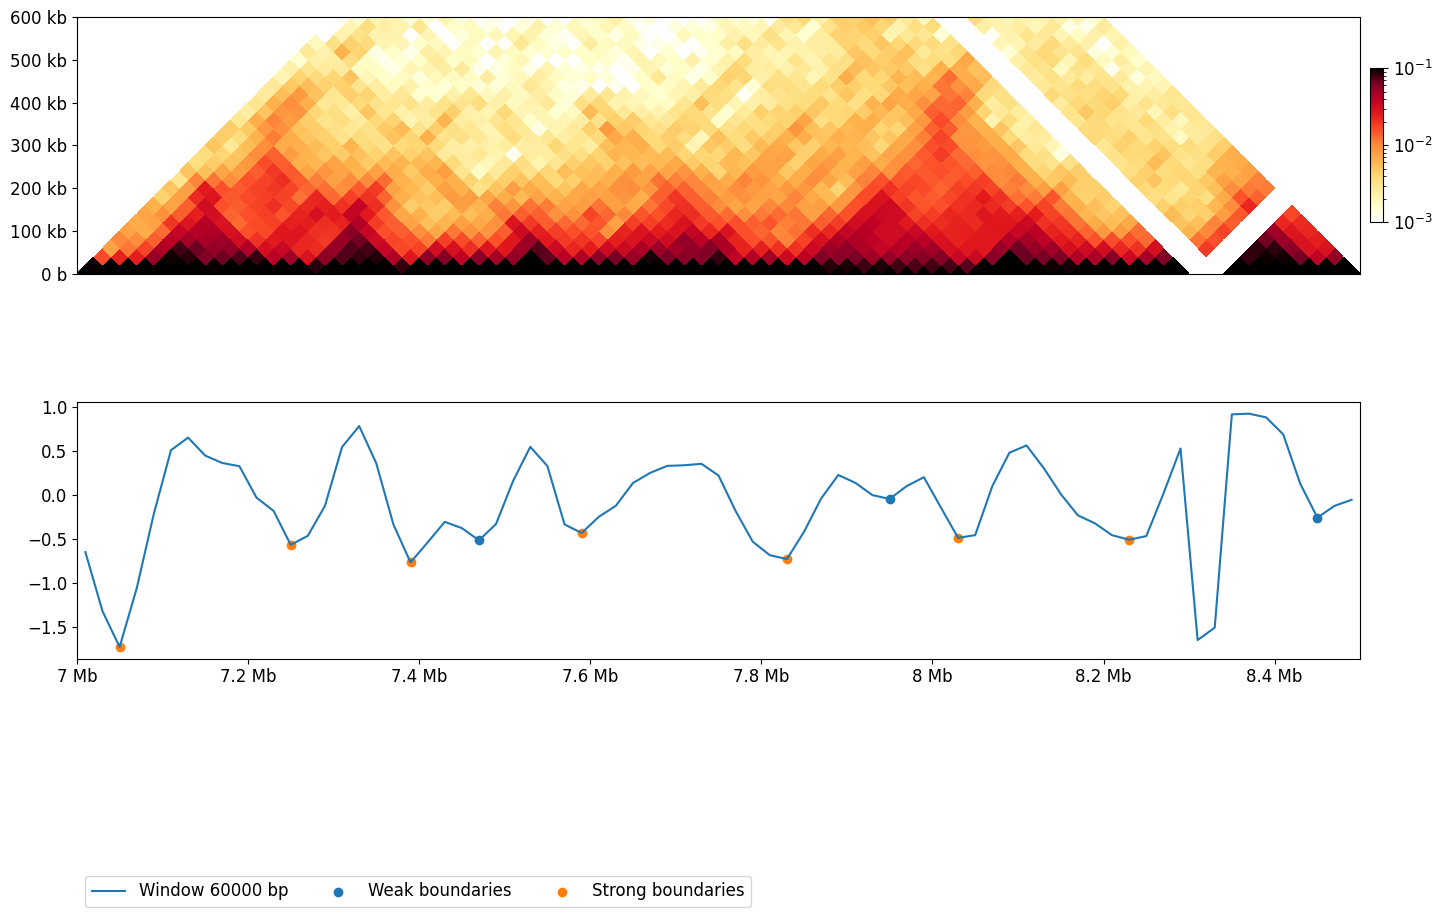

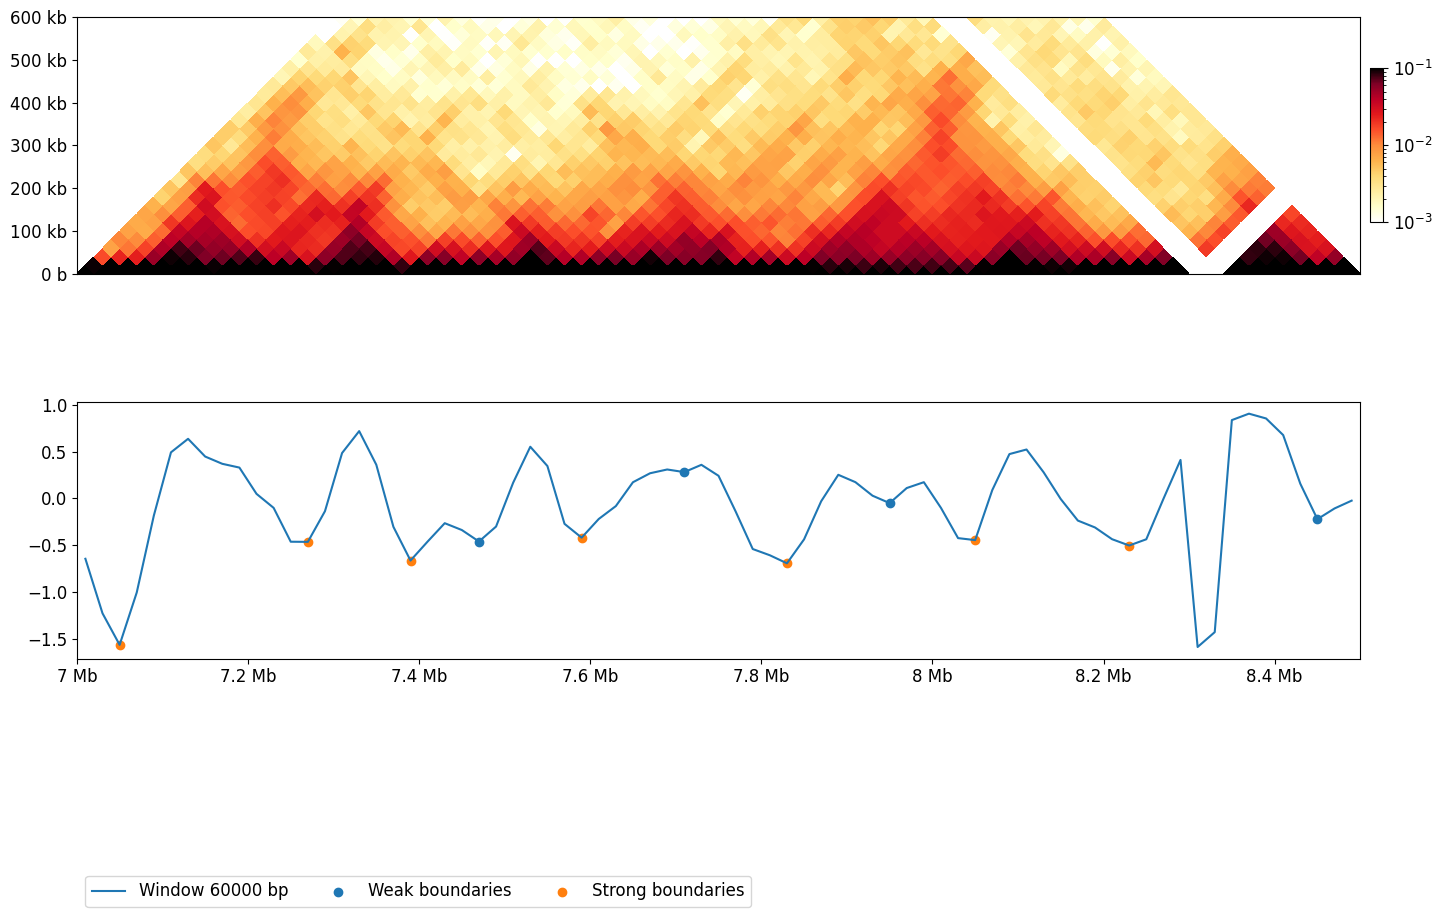

In [67]:
for i in range(4):
  f, ax = plt.subplots(figsize=(20, 10))
  im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
  ax.set_aspect(0.5)
  ax.set_ylim(0, 10*windows[0])
  format_ticks(ax, rotate=False)
  ax.xaxis.set_visible(False)

  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
  plt.colorbar(im, cax=cax)

  insul_region = bioframe.select(insulation_table[i], region)

  ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

  ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
              insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

  boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
  weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
  strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
  ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
              weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
  ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
              strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

  ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

  format_ticks(ins_ax, y=False, rotate=False)
  ax.set_xlim(region[1], region[2])

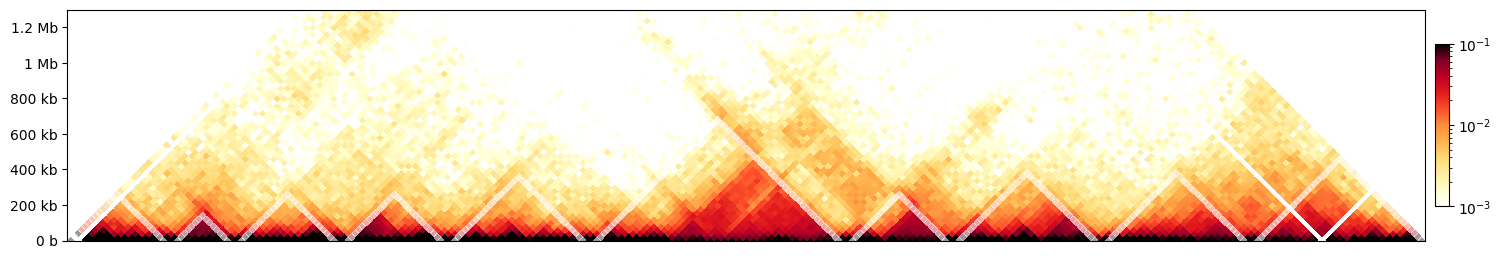

In [23]:
region = ('chr3R', TADs_table[0].iloc[0].start, TADs_table[0].iloc[9].end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr[0].matrix(balance=True).fetch(region)

f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 13*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

idx = 10
max_pos = TADs_table[0][:idx]['end'].max()/resolution
contact_matrix = np.zeros((int(max_pos), int(max_pos)))
contact_matrix[:] = np.nan
for _, row in TADs_table[0][:idx].iterrows():
    contact_matrix[int(row['start']/resolution):int(row['end']/resolution), int(row['start']/resolution):int(row['end']/resolution)] = 1
    contact_matrix[int(row['start']/resolution + 1):int(row['end']/resolution - 1), int(row['start']/resolution + 1):int(row['end']/resolution - 1)] = np.nan

im = pcolormesh_45deg(ax, contact_matrix, start=0, resolution=resolution, cmap='gray', vmax=1, vmin=-1, alpha=0.6)

plt.show()